In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import tensorflow as tf

In [4]:
print(np.__version__)


1.22.4


2.EDA

In [11]:
import nltk

In [12]:
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [5]:
df=pd.read_csv('combined_data.csv')

In [6]:
df.head()

,label,text
0,1,ounce feather bowl hummingbird opec moment ala...
1,1,wulvob get your medircations online qnb ikud v...
2,0,computer connection from cnn com wednesday es...
3,1,university degree obtain a prosperous future m...
4,0,thanks for all your answers guys i know i shou...


In [7]:
df['text'] = df['text'].str.lower()

In [8]:
import string

In [9]:
def remove_special_characters(word):
    return word.translate(str.maketrans('', '', string.punctuation))

df['text'] = df['text'].apply(remove_special_characters)

In [10]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk import ngrams
import re

In [11]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder

In [12]:
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, LSTM, Embedding, Dropout, Activation, Bidirectional
import tensorflow as tf

In [13]:
ENGLISH_STOP_WORDS = set(stopwords.words('english'))

def remove_stop_words(words):
    return [word for word in words if word not in ENGLISH_STOP_WORDS]

# Tokenize the text
df['text'] = df['text'].apply(word_tokenize)

# Remove stop words
df['text'] = df['text'].apply(remove_stop_words)

df['text'] = df['text'].apply(' '.join)

In [14]:
def remove_hyperlink(word):
    return re.sub(r"http\S+", "", word)

df['text'] = df['text'].apply(remove_hyperlink)

In [15]:
for i in range (1,3):
    print("Email #"+str(i))
    spam_email = df[df['label'] == 1]['text'].iloc[i]
    print(spam_email+"\n")

Email #1
wulvob get medircations online qnb ikud viagra escapenumber escapenumber levitra escapenumber escapenumber cialis escapenumber escapenumber imitrex escapenumber escapenumber flonax escapenumber escapenumber ultram escapenumber escapenumber vioxx escapenumber escapenumber ambien escapenumber escapenumber valium escapenumber escapenumber xannax escapenumber escapenumber soma escapenumber meridia escapenumber escapenumber escapenumber escapenumber cysfrt ever stopped wonder much average man pays mediecines ap painkillers drugs improve quality life weight reducing tablets many escapenumber whats worse mediucine costs lot branded rfwur intrested http dmvrwm remunerativ net dfuaeirxygiq visit website escapenumber

Email #2
university degree obtain prosperous future money earning power prestige comes career position youve always dreamed diploma prestigious non accredited unversities based present knowledge professional experience qualify required tests classes books examinations con

In [16]:
for i in range (1,3):
    print("Email #"+str(i))
    legitimate_email = df[df['label'] == 0]['text'].iloc[i]
    print(legitimate_email+"\n")

Email #1
thanks answers guys know checked rsync manual would rather get escapenumber sure answer one current script bin bash rsync avt exclude alpha exclude arm exclude hppa exclude hurd exclude iaescapenumber exclude mescapenumberk exclude mips exclude mipsel exclude multi arch exclude powerpc exclude sescapenumber exclude sh exclude sparc exclude source ftp de debian org debian cd var www mirror debian cd know loads excludes include distros soon rsync manual del alias delete delete delete extraneous files dest dirs delete receiver deletes transfer default delete receiver deletes xfer delete receiver deletes transfer delete excluded also delete excluded files dest dirs delete would suggest use thanks john escapelong escapenumber escapenumber escapenumber olleg samoylov wrote jonathan escapelong wrote sorry banal question favourite keys escapenumber stage rsync rsync verbose recursive links hard links times filter r tmp delete delay updates source url destination log file olleg samoylo

In [17]:
!pip install wordcloud

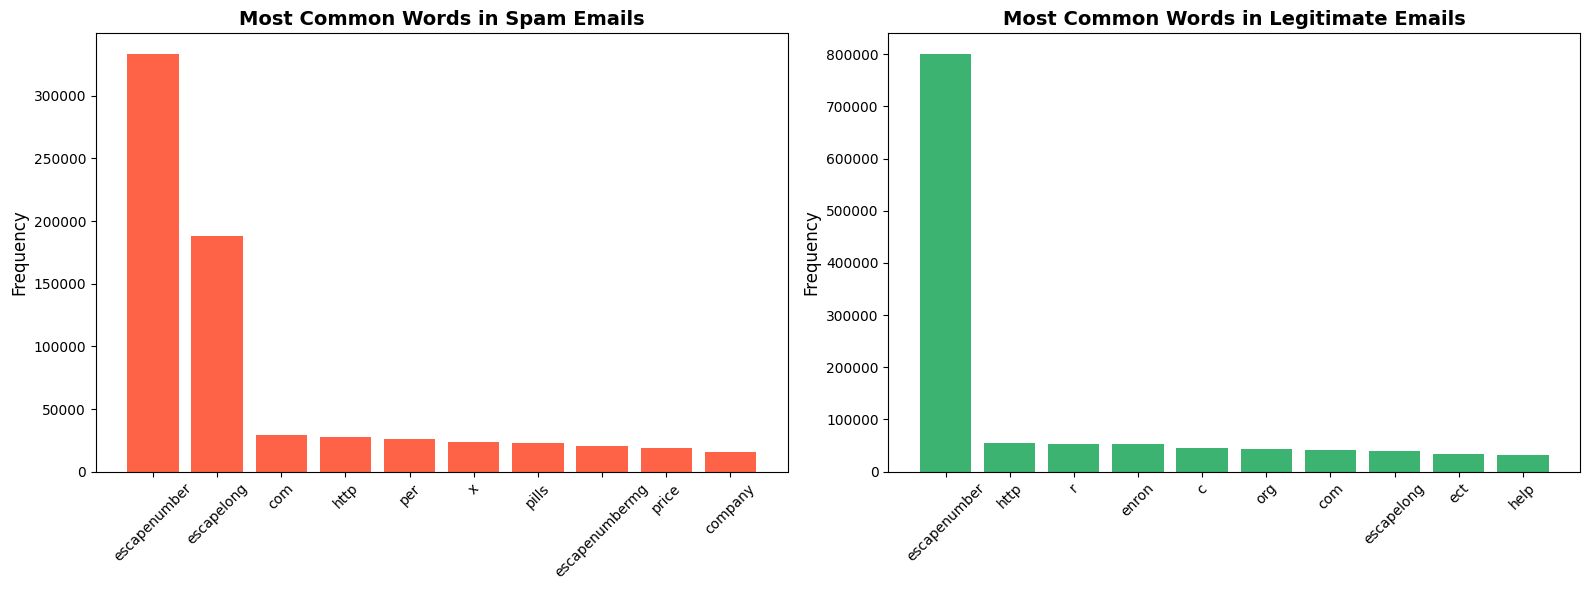

In [18]:
from collections import Counter
import matplotlib.pyplot as plt

# Separate the spam and legitimate emails
spam_emails = df.loc[df['label'] == 1, 'text']
legit_emails = df.loc[df['label'] == 0, 'text']

# Define a function to count word frequencies
def count_word_frequencies(email_series):
    word_counter = Counter()
    email_series.str.split().apply(word_counter.update)
    return word_counter

# Count word frequencies for spam and legitimate emails
spam_words = count_word_frequencies(spam_emails)
legit_words = count_word_frequencies(legit_emails)

# Get the 10 most common words for each category
spam_common = spam_words.most_common(10)
legit_common = legit_words.most_common(10)

# Convert to DataFrames for visualization
spam_common_df = pd.DataFrame(spam_common, columns=['Word', 'Frequency'])
legit_common_df = pd.DataFrame(legit_common, columns=['Word', 'Frequency'])

# Set up the figure for plotting
plt.figure(figsize=(16, 6))

# Plot the most common words in spam emails
plt.subplot(1, 2, 1)
plt.bar(spam_common_df['Word'], spam_common_df['Frequency'], color='tomato')
plt.title('Most Common Words in Spam Emails', fontsize=14, fontweight='bold')
plt.xticks(rotation=45, fontsize=10)
plt.ylabel('Frequency', fontsize=12)

# Plot the most common words in legitimate emails
plt.subplot(1, 2, 2)
plt.bar(legit_common_df['Word'], legit_common_df['Frequency'], color='mediumseagreen')
plt.title('Most Common Words in Legitimate Emails', fontsize=14, fontweight='bold')
plt.xticks(rotation=45, fontsize=10)
plt.ylabel('Frequency', fontsize=12)

# Adjust layout for better visual appeal
plt.tight_layout()

# Display the plots
plt.show()

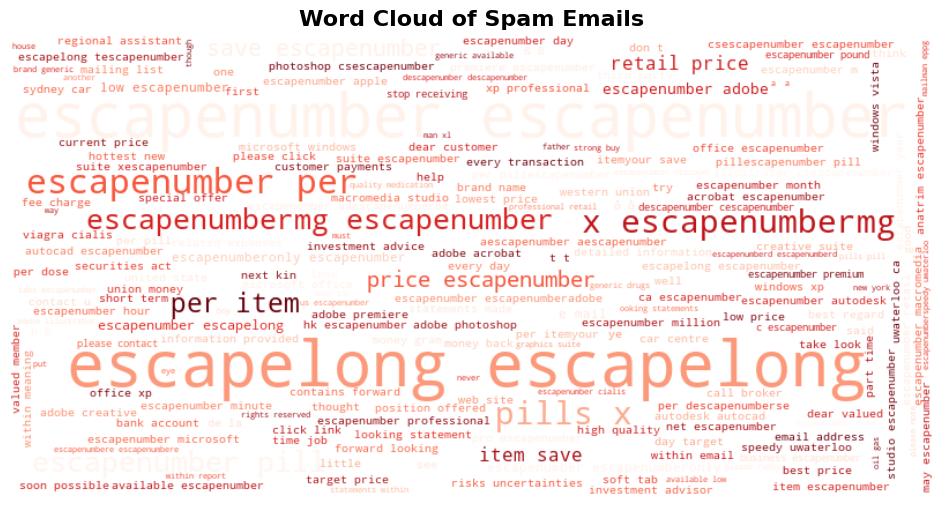

In [19]:
from wordcloud import WordCloud
#import matplotlib.pyplot as plt

# Generate a word cloud image for spam words
spam_wordcloud = WordCloud(
    width=800,  # Width of the image
    height=400,  # Height of the image
    background_color='white',  # Background color for better visibility
    colormap='Reds',  # Color theme to match the spam context
    max_words=200,  # Limit the number of words to show in the cloud
    contour_color='black',  # Optional: Outline color for the word cloud
    contour_width=1  # Optional: Outline width for a polished look
).generate(' '.join(spam_emails))  # Join all spam emails into a single string

# Display the word cloud image
plt.figure(figsize=(12, 6))  # Adjust figure size for better visualization
plt.imshow(spam_wordcloud, interpolation='bilinear')  # Use bilinear interpolation for smooth display
plt.axis('off')  # Turn off axes for a clean look
plt.title('Word Cloud of Spam Emails', fontsize=16, fontweight='bold')  # Add a descriptive title
plt.show()

Feature Engineering: Data Splitting

In [20]:
X = df['text']
y = df['label']

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [21]:
X_train

29134    one set rise http www imagehosting com php ies...
66070    people getting rich using system turn cracked ...
4908     cc ing legal please try follow one list chat t...
48341                             please see attached memo
40451    gorgeous presents may find make clear mind mor...
                               ...                        
21440    hi folks attached go updating sambaescapenumbe...
73349    biostatistician statistical programmer data an...
50057    know escapenumber girls prefer guys descent ra...
5192     sebastian p luque wrote came across case there...
77708    order provide appropriate degree coordination ...
Name: text, Length: 66758, dtype: object

Tokenization

In [22]:
max_features = 5000
tokenizer = Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(X_train)

# Convert texts to sequences
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

In [23]:
len(X_train_seq)

66758

In [24]:
len(X_test_seq)

16690

Sequence Padding for Consistent Input Lengths

In [25]:
average_length = df['text'].apply(len).mean()
print("Average Length: "+str(average_length))

max_length = 500 

X_train_padded = pad_sequences(X_train_seq, maxlen=max_length, padding='post')
X_test_padded = pad_sequences(X_test_seq, maxlen=max_length, padding='post')

Average Length: 1305.4409692263446


In [26]:
y_test

48104    0
41270    0
17204    1
33996    0
29591    1
        ..
7567     0
47290    1
79156    0
21571    1
7344     1
Name: label, Length: 16690, dtype: int64

In [27]:
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)

y_test_encoded = label_encoder.transform(y_test)
     

In [28]:
import pickle

# Save the trained LabelEncoder to a file
with open('label_encoder2.pkl', 'wb') as file:
    pickle.dump(label_encoder, file)

Model Selection: Using Bi-Directional LSTM for Text Classification

In [34]:
max_features = 5000  # Vocabulary size (ensure this is defined)
embedding_vector_length = 32
max_length = 500  # Length of input sequences

# Define the model
model = Sequential()
model.add(Embedding(input_dim=max_features, output_dim=embedding_vector_length, input_length=max_length))
model.add(Bidirectional(LSTM(64)))
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1, activation='sigmoid'))

# Build the model explicitly
model.build(input_shape=(None, max_length))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Print summary
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 500, 32)           160000    
                                                                 
 bidirectional (Bidirectiona  (None, 128)              49664     
 l)                                                              
                                                                 
 dense (Dense)               (None, 16)                2064      
                                                                 
 dropout (Dropout)           (None, 16)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 17        
                                                                 
Total params: 211,745
Trainable params: 211,745
Non-trainable params: 0
__________________________________________________

In [35]:
from keras.callbacks import EarlyStopping

# Define the early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(X_train_padded, y_train_encoded,
                    batch_size=512,
                    epochs=20,
                    validation_data=(X_test_padded, y_test_encoded),
                    callbacks=[early_stopping])

Epoch 1/20
131/131 [==============================] - 27s 126ms/step - loss: 0.3489 - accuracy: 0.8653 - val_loss: 0.0843 - val_accuracy: 0.9720
Epoch 2/20
131/131 [==============================] - 16s 121ms/step - loss: 0.0660 - accuracy: 0.9808 - val_loss: 0.0638 - val_accuracy: 0.9817
Epoch 3/20
131/131 [==============================] - 16s 121ms/step - loss: 0.0602 - accuracy: 0.9830 - val_loss: 0.0573 - val_accuracy: 0.9837
Epoch 4/20
131/131 [==============================] - 15s 118ms/step - loss: 0.0396 - accuracy: 0.9893 - val_loss: 0.0604 - val_accuracy: 0.9832
Epoch 5/20
131/131 [==============================] - 15s 118ms/step - loss: 0.1203 - accuracy: 0.9721 - val_loss: 0.0562 - val_accuracy: 0.9839
Epoch 6/20
131/131 [==============================] - 15s 118ms/step - loss: 0.0336 - accuracy: 0.9912 - val_loss: 0.0580 - val_accuracy: 0.9838
Epoch 7/20
131/131 [==============================] - 16s 121ms/step - loss: 0.0285 - accuracy: 0.9925 - val_loss: 0.0596 - val_ac

In [4]:
import torch

In [36]:
import keras.saving

In [58]:
torch.cuda.get_device_name()

'NVIDIA GeForce RTX 3050 A Laptop GPU'

In [37]:
model.save('Trial.h5')

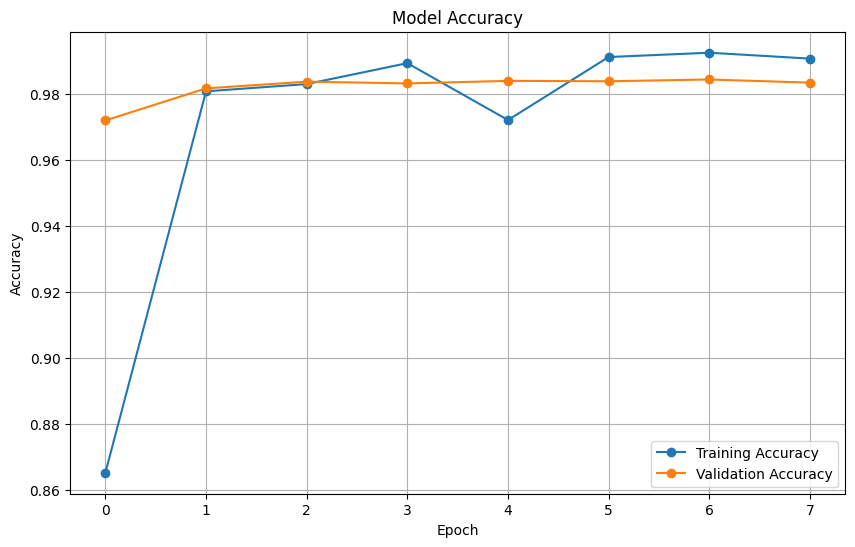

In [38]:
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy', marker='o')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', marker='o')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

In [40]:
y_pred = model.predict(X_test_padded)
y_predict = [1 if o > 0.5 else 0 for o in y_pred]

522/522 [==============================] - 25s 45ms/step


In [7]:
print("CUDA Available:", torch.cuda.is_available())

CUDA Available: True


In [11]:
print("Num GPUs Available:", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available: 1


In [12]:
print(tf.sysconfig.get_build_info()["cuda_version"])
print(tf.sysconfig.get_build_info()["cudnn_version"])


64_112
64_8


In [6]:
import tensorflow as tf

In [29]:
print(tf.__version__) 

2.10.0


In [31]:
cuda_version = tf.sysconfig.get_build_info().get('cuda_version', 'Not Found')

In [32]:
print(f"CUDA Version: {cuda_version}")

CUDA Version: 64_112


In [7]:
print(tf.sysconfig.get_build_info())


OrderedDict([('cpu_compiler', 'C:/Program Files (x86)/Microsoft Visual Studio/2019/Community/VC/Tools/MSVC/14.29.30133/bin/HostX64/x64/cl.exe'), ('cuda_compute_capabilities', ['sm_35', 'sm_50', 'sm_60', 'sm_70', 'sm_75', 'compute_80']), ('cuda_version', '64_112'), ('cudart_dll_name', 'cudart64_112.dll'), ('cudnn_dll_name', 'cudnn64_8.dll'), ('cudnn_version', '64_8'), ('is_cuda_build', True), ('is_rocm_build', False), ('is_tensorrt_build', False), ('msvcp_dll_names', 'msvcp140.dll,msvcp140_1.dll'), ('nvcuda_dll_name', 'nvcuda.dll')])


In [33]:
print(tf.config.experimental.list_physical_devices('GPU'))
print(tf.config.experimental.get_visible_devices('GPU'))

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [41]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score


In [42]:
cf_matrix = confusion_matrix(y_test_encoded, y_predict)

# Extract True Negatives, False Positives, False Negatives, True Positives
tn, fp, fn, tp = cf_matrix.ravel()

# Calculate performance metrics
precision = precision_score(y_test_encoded, y_predict)
recall = recall_score(y_test_encoded, y_predict)
f1 = f1_score(y_test_encoded, y_predict)
accuracy = accuracy_score(y_test_encoded, y_predict)

# Print metrics
print(f"Precision: {precision*100:.2f}%")
print(f"Recall: {recall*100:.2f}%")
print(f"F1 Score: {f1*100:.2f}%")
print(f"Accuracy: {accuracy*100:.2f}%")

Precision: 97.90%
Recall: 99.07%
F1 Score: 98.48%
Accuracy: 98.39%
